# ECE 657A - Assignment 1
Date Submitted: 4 Feburary 2022

We start by loading the necessary libraries that will be used for the assignment

In [2]:
# List of libraries
import math
import numpy as np
import pandas as pd
import random
import seaborn as sb
from sklearn import neighbors
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing 
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import warnings

## Part 1: Assessment of Data and Applying Normalization (on Abalone Dataset only)

### Question 1.1: Load the dataset

Next we will load the data using pandas. Furthermore, we will provide heading to the columns/features of the data as the headings are not found in the csv file. 

The first five rows of the abalone data are shown below:

In [3]:
# Columns/ Features for the data
heading = ["Sex", "Length (mm)", "Diameter (mm)", "Height (mm)", "Whole Weight (g)", "Shucked Weight (g)", "Viscera Weight (g)", "Shell Weight (g)", "Rings"]

#Loading Data set by using pandas
abalone = pd.read_csv("abalone.csv", sep=",", names = heading)
abalone.head()

,Sex,Length (mm),Diameter (mm),Height (mm),Whole Weight (g),Shucked Weight (g),Viscera Weight (g),Shell Weight (g),Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Sex is an unordered (nominal) categorical feature. We can use the one hot encoder of the skilearn library to convert it into integer values

In [4]:
sex_feature = preprocessing.OneHotEncoder(sparse = False)
sex_feature.fit_transform(abalone[["Sex"]])

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

By using OneHotEncoder, three columns will be added to the dataset which will be done later

The shape of the abalone data is the following:

In [5]:
print(abalone.shape)

(4177, 9)


The data set has 4177 rows and 9 columns/features.

The range and the distribution of the features of the data can be determined by using the describe command as shown below:

In [6]:
abalone.describe()

,Length (mm),Diameter (mm),Height (mm),Whole Weight (g),Shucked Weight (g),Viscera Weight (g),Shell Weight (g),Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Based on the results of the describe function, it can be seen that except the feature of "sex", all the features are numerical. The sex feature is a nominal type data and the describe feature will not provide information regarding it. 

The data type of the individual columns is the following

In [7]:
print(abalone.dtypes)


Sex                    object
Length (mm)           float64
Diameter (mm)         float64
Height (mm)           float64
Whole Weight (g)      float64
Shucked Weight (g)    float64
Viscera Weight (g)    float64
Shell Weight (g)      float64
Rings                   int64
dtype: object


The sex feature, which is an ordinal type data is represented by an object data type in python. The Rings feature is the only feature which is represented by an integer. The rest of the features are float type data

### Question 1.2: Is there any missing data?

The total number of rows determined by the shape function were 4177. We can determine whether there is any data missing by using the pandas dataframe info function as shown below:

In [8]:
print(abalone.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sex                 4177 non-null   object 
 1   Length (mm)         4177 non-null   float64
 2   Diameter (mm)       4177 non-null   float64
 3   Height (mm)         4177 non-null   float64
 4   Whole Weight (g)    4177 non-null   float64
 5   Shucked Weight (g)  4177 non-null   float64
 6   Viscera Weight (g)  4177 non-null   float64
 7   Shell Weight (g)    4177 non-null   float64
 8   Rings               4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB
None


As shown by the info function, there are 4177 rows and all features have 4177 non-null counts. Therefore, no data is missing

This can also be validated by "isnull" function which will revalidate the claim

In [9]:
abalone.isnull().sum()

Sex                   0
Length (mm)           0
Diameter (mm)         0
Height (mm)           0
Whole Weight (g)      0
Shucked Weight (g)    0
Viscera Weight (g)    0
Shell Weight (g)      0
Rings                 0
dtype: int64

There are no null values in all the features of the data

### Question 1.3: Compute the moments or summarization statistics on the data features

The summarization statistics of the numerical data is the following:

In [10]:
abalone.describe()

,Length (mm),Diameter (mm),Height (mm),Whole Weight (g),Shucked Weight (g),Viscera Weight (g),Shell Weight (g),Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Among the numerical data, rings has the widest range, followed by whole weight, shucked weight and shell weight.

We can look at the number of unique values of each of the columns to determine the diversity of the data

In [11]:
abalone.nunique()

Sex                      3
Length (mm)            134
Diameter (mm)          111
Height (mm)             51
Whole Weight (g)      2429
Shucked Weight (g)    1515
Viscera Weight (g)     880
Shell Weight (g)       926
Rings                   28
dtype: int64

For "Whole weight" and "shucked weight", the number of unique values is higher from the "Rings", "Height" and "Diameter". 

We can see the distinct categories of the sex feature by using the following command:

In [12]:
abalone["Sex"].unique()

array(['M', 'F', 'I'], dtype=object)

The sex feature has three unique values: "M", "F" & "I"

Furthermore, we can see the distribution of the data by making a box plot as shown below:

<AxesSubplot:>

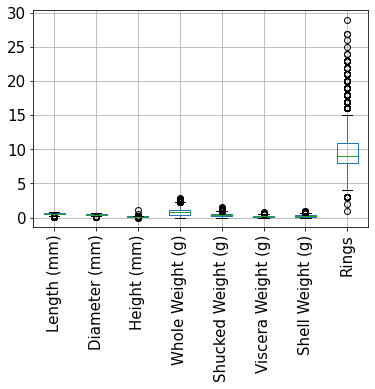

In [13]:
pd.plotting.boxplot(abalone, grid=True, rot=90, fontsize=15)

It can be observed that the rings feature has a much wider data set than the other features. The sex Feature is not shown as it is an ordinal data type

We can make box plot by removing the rings feature to have a better understanding of the rest of the feature distribution

<AxesSubplot:>

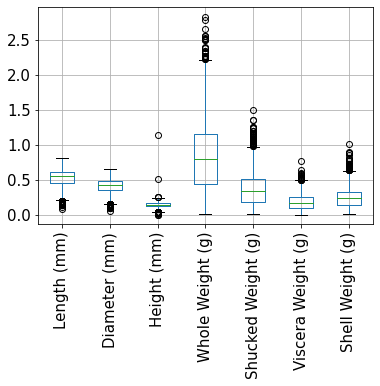

In [14]:
a = abalone.drop(columns=["Rings"])
pd.plotting.boxplot(a, grid=True, rot=90, fontsize=15)

After removing the rings feature, it can be seen that whole weight has the wider data set when compared to that of the other features. With this box plot, we can get an idea of the distribution of the features.

We can continue with removing whole weight to see the distribution of the rest of the features. However, this is not a practical strategy and it is better to normalize the features so that the comparison is better. 

### Question 1.4: Check for Outliers

We will use a histogram to determine whether a feature of the data has extreme values by using 2 different bin sizes

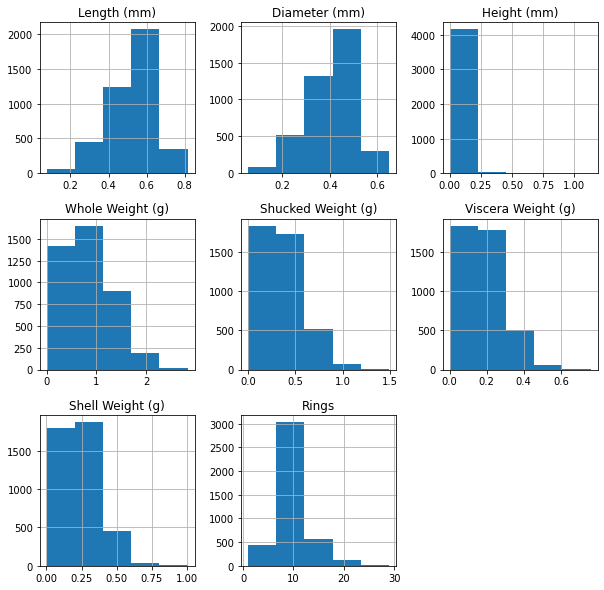

In [15]:
histogram_bin5 = abalone.hist(bins = 5, figsize = (10,10))

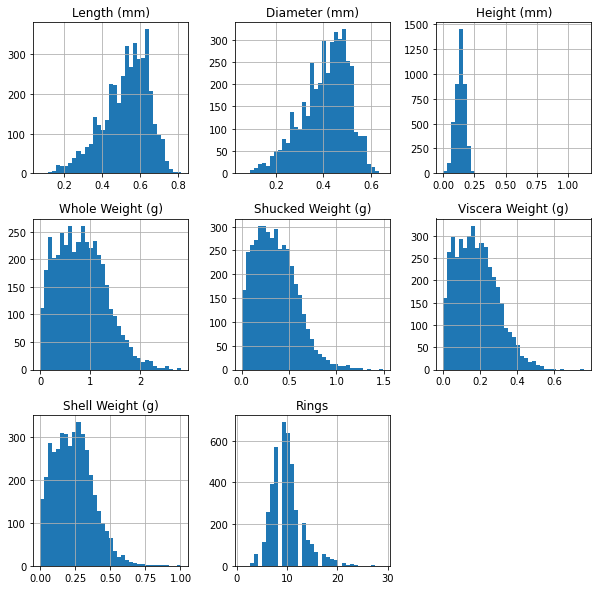

In [16]:
histogram_bin35 = abalone.hist(bins = 35, figsize = (10,10))

After comparing the two histrograms, it can be observed that the following features have outlier values:
1. Rings
2. Whole Weight (g)
3. Shucked Weight (g)
4. Height (mm)

All of the aforementioned features have outliers above the maximum values

### Question 1.5: Data Set Balanced?

To see whether the data is balanced, we need to see the number of unique sex features are there in the data. 

This is done by using the value_counts() function as shown below:

In [17]:
sex_count = abalone["Sex"].value_counts()
print(sex_count)

M    1528
I    1342
F    1307
Name: Sex, dtype: int64


We can also determine the ratio count which is shown below:

In [18]:
total = abalone.shape[0]
sex_ratio = pd.DataFrame([sex_count[0]/total, sex_count[1]/total, sex_count[2]/total], index = ["M", "I", "F"])
sex_ratio[0]

M    0.365813
I    0.321283
F    0.312904
Name: 0, dtype: float64

As it can be seen, the ratio of "I" and "F" are similar, but "M" is slightly higher.

Although "M" is slightly higher, the data can be considered balanced as there is not too much of a difference among the ratios.




### Question 1.6a

Normalization is the process of rescaling the features' values for conducting comparisions among different features. Since individual features may have different ranges, comparision may be difficult. 

For the abalone data set, normalization is necessary as the rings feature and whole weight feature have considerably wider ranges when compared to that of the remaining features. This results in issues during comparing the different features. 

### Question 1.6b

#### Before Normalization

In [19]:
abalone_n = abalone[["Diameter (mm)", "Height (mm)", "Whole Weight (g)"]]

We will now plot the graph to see the results:

<AxesSubplot:xlabel='Diameter (mm)'>

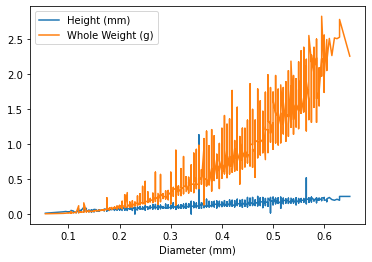

In [20]:
abalone_n_raw_sort = abalone.sort_values(by="Diameter (mm)")
abalone_n_raw_sort.describe()
abalone_n_raw_sort.plot(x=["Diameter (mm)"][0], y=["Height (mm)", "Whole Weight (g)"])

As it can be observed, the there is a higher deviation in the whole weight and height is not in the same range as whole weight

#### After Min-Max Normalization

We start by first normalizing the 3 features as shown below:

In [21]:
abalone_n_minmaxnormalized = ((abalone_n-abalone_n.min())-(abalone_n.max()-abalone_n.min()))

Then we will first sort the data by rings and then plot the graph for comparision

<AxesSubplot:xlabel='Diameter (mm)'>

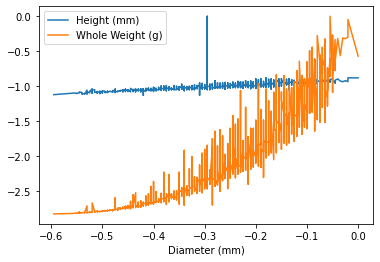

In [22]:
abalone_n_minmaxnorm_sort = abalone_n_minmaxnormalized.sort_values(by="Diameter (mm)")
abalone_n_minmaxnorm_sort.describe()
abalone_n_minmaxnorm_sort.plot(x=["Diameter (mm)"][0], y=["Height (mm)", "Whole Weight (g)"])

Min-Max normalizaiton only changed the y axis shift of the distribution. From comparision, its is visible that the relative variation of Height and Whole Weight is the same as before. However, after using Min-Max normalization, they are in similar ranges when compared to raw data 

### Question 1.6c

##### Before Normalization

The raw data is the same as in the previous part as shown below:

<AxesSubplot:xlabel='Diameter (mm)'>

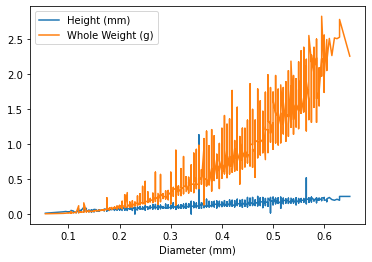

In [23]:
abalone_n_raw_sort.plot(x=["Diameter (mm)"][0], y=["Height (mm)", "Whole Weight (g)"])

##### After Z - Score Normalization

We will now normalize the three features as shown below:

In [24]:
abalone_znormalized = abalone_n.apply(stats.zscore)

We will now plot the graph to see the effects:

<AxesSubplot:xlabel='Diameter (mm)'>

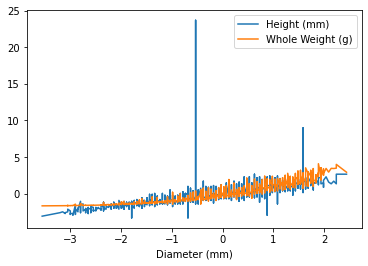

In [25]:
abalone_znormalized_sort = abalone_znormalized.sort_values(by="Diameter (mm)")
abalone_znormalized_sort.plot(x=["Diameter (mm)"][0], y=["Height (mm)", "Whole Weight (g)"])

After Z-Score normalization, the distribution is more comparible compared to the raw data. This because the variation of the two features are similar and apart from the extreme values, both of them are in a similar range which make comparisons easy.

 Furthermore, the Z-Score normalization is better than Min-Max normalization as the range and the variation in the both the features are similar.

## Part 2: Classification with KNN (on both datasets)

### Question 2.1: Divide the data into a training set and a test set (80%, 20%)

#### 2.1.1 Wine Dataset

First we start by loading the wine data

In [26]:
wine_r = pd.read_csv("winequality-red.csv", sep=";")
wine_w = pd.read_csv("winequality-white.csv", sep=";")

Then we add the feature labels and combine both the red wine and white wine data into a single dataframe as shown below:

In [27]:
# the following code has been taken from assignment 0
#Columns/Features
D = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
L = 'quality'
C = 'color'
DL = D + [L]
DC = D + [C]
DLC = DL + [C]


wine_w= wine_w.copy()
wine_w[C]= np.zeros(wine_w.shape[0])
wine_r[C]= np.ones(wine_r.shape[0])
wine = pd.concat([wine_w,wine_r], ignore_index=True)

# split the the target variable (quality) from the dataset
wine_y = wine["quality"]
wine_x = wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol','color']]

The target variable is the quality feature in the dataset. We cannot normalize the quality feature as it will convert it into a float value which results in not being able to classify the data. 

As normalization does not change the shape of the distribution of the features, we dont need to normalize the target variable. Furthermore, the KNN classifier only uses the target variable training data to classify the reamaining features.

Therefore, we will normalize all the features except the target feature and split the data into training and testing set as shown below:

In [28]:
# seperate the target variable from the rest of the variables
wine_quality = wine["quality"]
wine_remaining_features = wine.drop(columns = ["quality"])

# normalize the remaining features of the dataset using min max normilization
wine_minmax = (wine_remaining_features-wine_remaining_features.min())/(wine_remaining_features.max()-wine_remaining_features.min())

# divide the data into training and testing set using the split ratio provided in the assignment instructions
wine_xnorm_train , wine_xnorm_test, wine_y_train, wine_y_test = train_test_split(wine_minmax,wine_quality,test_size = 0.20,train_size=0.8, random_state=27)

#### 2.1.2 Abalone Dataset

The sex feature is an unordered (nominal) categorical feature. We can use the "get dummies" function of pandas to convert it into integer values

Get dummies function adds the number of distinct labels of a perticular feature to the dataset columns as shown below:

In [29]:
abalone_oht = pd.get_dummies(abalone)
abalone_oht.head()

,Length (mm),Diameter (mm),Height (mm),Whole Weight (g),Shucked Weight (g),Viscera Weight (g),Shell Weight (g),Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


After executing the above command, the original feature column has been dropped and three new columns have been added

In [30]:
# seperate the target variable from the rest of the variables
abalone_oht_rings = abalone_oht["Rings"]
abalone_oht_remaining_features = abalone_oht.drop(columns=["Rings"])

# normalize the remaining features of the dataset using min max normilization
abalone_oht_minmax = (abalone_oht_remaining_features-abalone_oht_remaining_features.min())/(abalone_oht_remaining_features.max()-abalone_oht_remaining_features.min())

# divide the data into training and testing set using the split ratio provided in the assignment instructions
abalone_xnorm_train , abalone_xnorm_test, abalone_y_train, abalone_y_test = train_test_split(abalone_oht_minmax,abalone_oht_rings,test_size = 0.20,train_size=0.8, random_state=27)

### Question 2.2: Train the model with the classifier's default parameters.

#### 2.2.1 Wine Dataset

We will make a wine classifier using KNN method in which the feature that is to be predicted by the classifier is "quality"

For the default setting of the KNN classifier, no paremeters have been provided which is shown below:

In [31]:
# the default settings of the KNN classifier have been used (k =5, weight = uniform, algorithm = auto, p = 2)
wine_classifier = KNeighborsClassifier()

# the training data is used to train the classifier
wine_classifier.fit(wine_xnorm_train,wine_y_train)

KNeighborsClassifier()

Now test data is used to check the accuracy of the classifier

In [32]:
# accuracy score is generated when the test data is used to determine the classifier's performance
wine_classifier.score(wine_xnorm_test, wine_y_test)

0.5646153846153846

The classification accuracy is 56 % on normalized data with the default settings of the classifier

#### 2.2.2 Abalone Dataset

We start with defining a classifier and then using training data to train the classifier

In [33]:
# the default settings of the KNN classifier have been used (k =5, weight = uniform, algorithm = auto, p = 2)
abalone_classifier = KNeighborsClassifier()

# the training data is used to train the classifier
abalone_classifier.fit(abalone_xnorm_train,abalone_y_train)

KNeighborsClassifier()

To determine the classification accuracy, we do the following:

In [34]:
# accuracy score is generated when the test data is used to determine the classifier's performance
abalone_classifier.score(abalone_xnorm_test, abalone_y_test)

0.22009569377990432

The classification accuracy is 22 % on normalized data with the default settings of the classifier

### Quetion 2.3: Find the best value for k

#### 2.3.1 Wine Dataset

We will use a for loop to determine the optimal value of k. This is done by iteration in which a classifier with a range of values of k are used to determine accuracy of the classifier as shown below:

In [35]:
wine_norm_uniform_score = []
k1 = None
for k1 in range(1,200):
    wine_norm_uniform_classifier = KNeighborsClassifier(n_neighbors=k1)
    wine_norm_uniform_classifier.fit(wine_xnorm_train,wine_y_train)
    wine_norm_uniform_score.append(wine_norm_uniform_classifier.score(wine_xnorm_test, wine_y_test))

Then we plot a line graph to see the result as shown below:

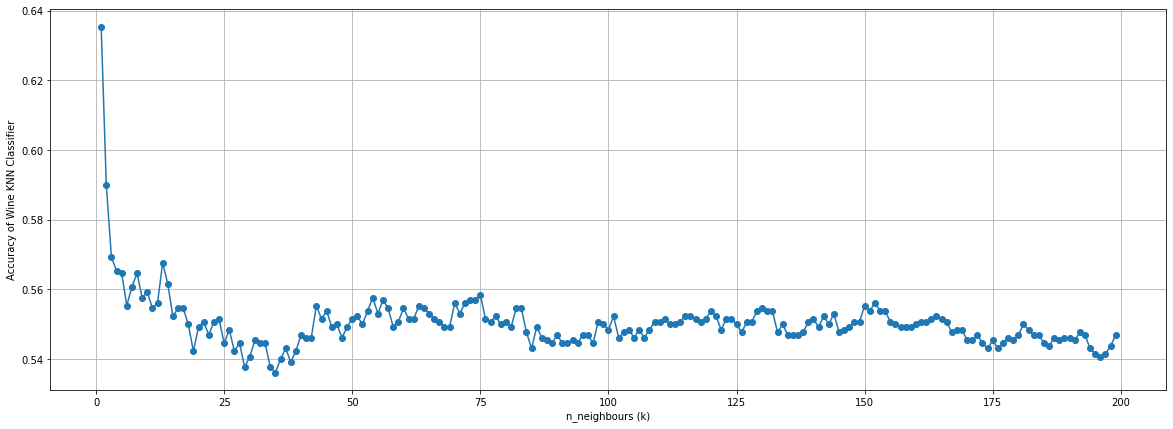

In [36]:
#plot a line graph to show the accuracy vs k value
plt.figure(figsize=(20, 7))
plt.plot(np.arange(1,200),wine_norm_uniform_score,marker='o')
plt.ylabel('Accuracy of Wine KNN Classifier')
plt.xlabel('n_neighbours (k)')
plt.grid(True)

From the graph, it is clear that k = 1 provides the best fit accuracy and the maximum accuracy acheived is:

In [37]:
max(wine_norm_uniform_score)

0.6353846153846154

By using the optimal k value of 1, the classificaiton accuracy is 63.5 % which is an improvement on 56 % which was achieved by using the default value of k = 5

#### 2.3.2 Abalone Dataset

We will use a for loop to determine the optimal value of k. This is done by iteration in which a classifier with a range of values of k are used to determine accuracy of the classifier as shown below:

In [38]:
abalone_norm_uniform_score = []
k1 = None
for k1 in range(1,200):
    abalone_norm_uniform_classifier = KNeighborsClassifier(n_neighbors=k1)
    abalone_norm_uniform_classifier.fit(abalone_xnorm_train,abalone_y_train)
    abalone_norm_uniform_score.append(abalone_norm_uniform_classifier.score(abalone_xnorm_test, abalone_y_test))

After the command is executed, we will plot the graph to see the result

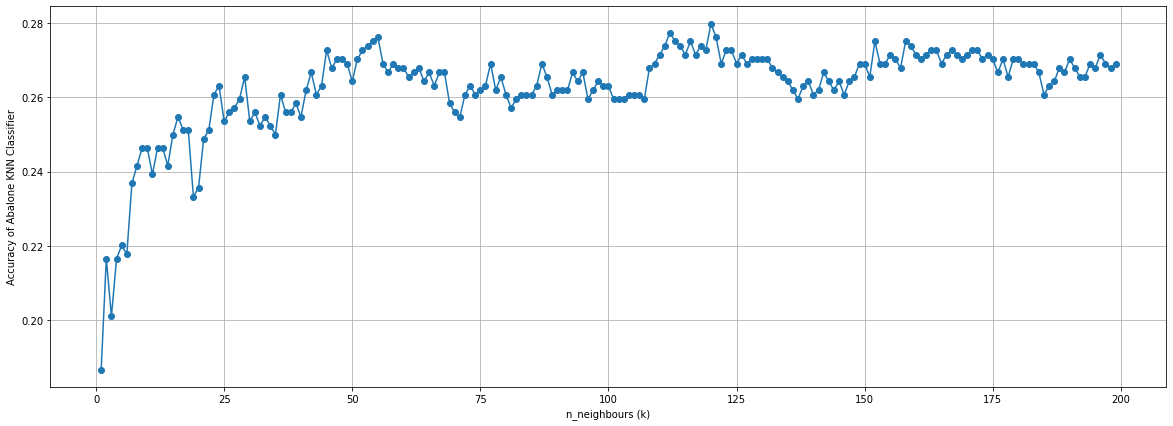

In [39]:
plt.figure(figsize=(20, 7))
plt.plot(np.arange(1,200),abalone_norm_uniform_score, marker='o')
plt.ylabel('Accuracy of Abalone KNN Classifier')
plt.xlabel('n_neighbours (k)')
plt.grid(True)

The highest accuracy and the value of k is the following:

In [40]:
print(f"Maximum Accuracy = {max(abalone_norm_uniform_score)*100} %")
print(f"Value of k for Maximum Accuracy = {abalone_norm_uniform_score.index(max(abalone_norm_uniform_score))+1}")

Maximum Accuracy = 27.990430622009573 %
Value of k for Maximum Accuracy = 120


The accuracy with k = 120 is 27.9 % which is an improvement on the 22 % that was achieved with the default value of k = 5

### Question 2.4: Weighted KNN

#### 2.4.1 Wine Dataset

We already have the results for default weight scheme of the classifier. We will use a for loop to generate the results for the manhatten & euclidean weight schemes as shown below:

In [41]:
# create the score list for manhattan and euclidean
wine_norm_manhattan_score = []
wine_norm_euclidean_score = []
k1 = None

# for loop will be used to get the accuracy with different values of neighbours
for k1 in range(1,200):
    # created the KNN classifier for manhattan and euclidean
    wine_norm_manhattan_classifier = KNeighborsClassifier(n_neighbors=k1, weights="distance", p=1)
    wine_norm_euclidean_classifier = KNeighborsClassifier(n_neighbors=k1, weights="distance", p=2)
    
    # training and storing the accuracy value of the manhattan classifier
    wine_norm_manhattan_classifier.fit(wine_xnorm_train,wine_y_train)
    wine_norm_manhattan_score.append(wine_norm_manhattan_classifier.score(wine_xnorm_test, wine_y_test))
    
    # training and storing the accuracy value of the euclidean classifier
    wine_norm_euclidean_classifier.fit(wine_xnorm_train,wine_y_train)
    wine_norm_euclidean_score.append(wine_norm_euclidean_classifier.score(wine_xnorm_test, wine_y_test))

After the execution of the execution of the for loop is completed, we will use this to plot a graph of the fit accuracy of all the weight schemes as shown below:

Text(0.5, 1.0, 'Normalized Wine data except target variable')

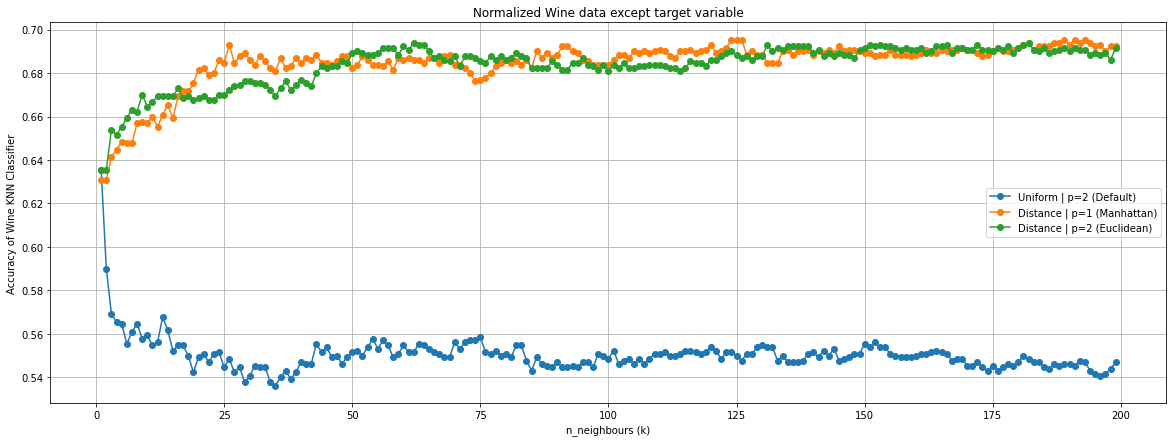

In [42]:
plt.figure(figsize=(20, 7))
plt.plot(np.arange(1,200),wine_norm_uniform_score,marker='o')
plt.plot(np.arange(1,200),wine_norm_manhattan_score,marker='o')
plt.plot(np.arange(1,200),wine_norm_euclidean_score,marker='o')
plt.ylabel('Accuracy of Wine KNN Classifier')
plt.xlabel('n_neighbours (k)')
plt.grid(True)
plt.legend(["Uniform | p=2 (Default)","Distance | p=1 (Manhattan)","Distance | p=2 (Euclidean)"])
plt.title("Normalized Wine data except target variable")

The accuracy of the default weight scheme decreases as the value of k increases. The accuracy of Manhattan and Euclidean increases and then plateaus after k = 50

The maximum accuracy and the value of k at which occurs for each weight scheme is the following:

In [43]:
wine_norm_result = pd.DataFrame()
wine_norm_result["Weight Scheme"] = ["Default","Manhattan", "Eculidean"]
wine_norm_result["Maximum Accuracy"] = [max(wine_norm_uniform_score),max(wine_norm_manhattan_score),max(wine_norm_euclidean_score)]
wine_norm_result["k for Max Accuracy"] = [wine_norm_uniform_score.index(max(wine_norm_uniform_score))+1,wine_norm_manhattan_score.index(max(wine_norm_manhattan_score))+1,wine_norm_euclidean_score.index(max(wine_norm_euclidean_score))+1]
wine_norm_result.set_index("Weight Scheme")

,Maximum Accuracy,k for Max Accuracy
Weight Scheme,,
Default,0.635385,1
Manhattan,0.695385,124
Eculidean,0.693846,62


#### 2.4.2 Abalone Dataset

We already have the results for default weight scheme of the classifier. We will use a for loop to generate the results for the manhatten & euclidean weight schemes as shown below:

In [44]:
# create the score list for manhattan and euclidean
abalone_norm_manhattan_score = []
abalone_norm_euclidean_score = []
k1 = None

# for loop will be used to get the accuracy with different values of neighbours
for k1 in range(1,200):
    # created the KNN classifier for manhattan and euclidean
    abalone_norm_manhattan_classifier = KNeighborsClassifier(n_neighbors=k1, weights="distance", p=1)
    abalone_norm_euclidean_classifier = KNeighborsClassifier(n_neighbors=k1, weights="distance", p=2)
    
    # training and storing the accuracy value of the manhattan classifier
    abalone_norm_manhattan_classifier.fit(abalone_xnorm_train,abalone_y_train)
    abalone_norm_manhattan_score.append(abalone_norm_manhattan_classifier.score(abalone_xnorm_test, abalone_y_test))
    
    # training and storing the accuracy value of the euclidean classifier
    abalone_norm_euclidean_classifier.fit(abalone_xnorm_train,abalone_y_train)
    abalone_norm_euclidean_score.append(abalone_norm_euclidean_classifier.score(abalone_xnorm_test, abalone_y_test))

After the execution of the for loop is completed, we will use this to plot a graph of the fit accuracy of all the weight schemes as shown below:

Text(0.5, 1.0, 'Normalized Abalone data except target variable')

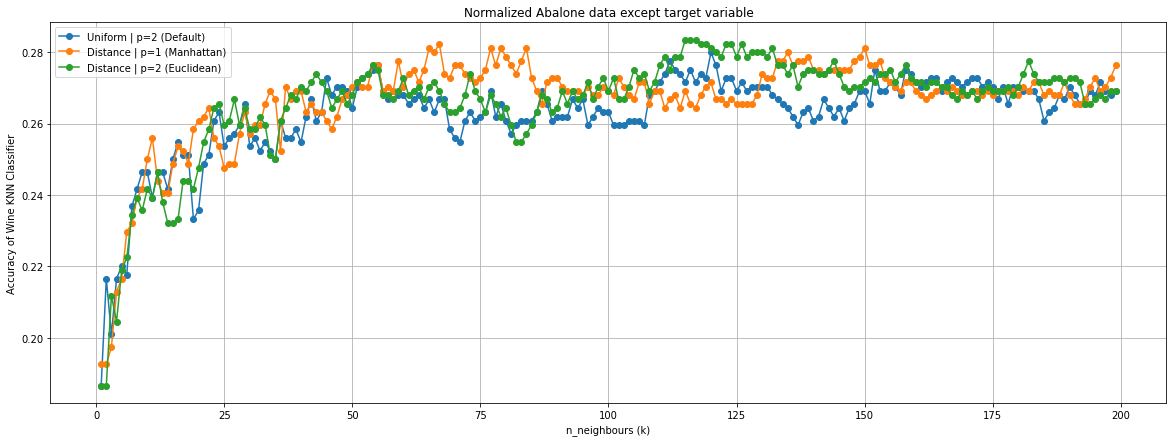

In [45]:
plt.figure(figsize=(20, 7))
plt.plot(np.arange(1,200),abalone_norm_uniform_score,marker='o')
plt.plot(np.arange(1,200),abalone_norm_manhattan_score,marker='o')
plt.plot(np.arange(1,200),abalone_norm_euclidean_score,marker='o')
plt.ylabel('Accuracy of Wine KNN Classifier')
plt.xlabel('n_neighbours (k)')
plt.grid(True)
plt.legend(["Uniform | p=2 (Default)","Distance | p=1 (Manhattan)","Distance | p=2 (Euclidean)"])
plt.title("Normalized Abalone data except target variable")

The performance of all three weight schemes increases as k increases and then fluctuates between 0.26 and 0.28

The maximum accuracy and the value of k at which it occurs for each weight scheme are the following:

In [46]:
abalone_norm_result = pd.DataFrame()
abalone_norm_result["Weight Scheme"] = ["Default","Manhattan", "Eculidean"]
abalone_norm_result["Maximum Accuracy"] = [max(abalone_norm_uniform_score),max(abalone_norm_manhattan_score),max(abalone_norm_euclidean_score)]
abalone_norm_result["k for Max Accuracy"] = [abalone_norm_uniform_score.index(max(abalone_norm_uniform_score))+1,abalone_norm_manhattan_score.index(max(abalone_norm_manhattan_score))+1,abalone_norm_euclidean_score.index(max(abalone_norm_euclidean_score))+1]
abalone_norm_result.set_index("Weight Scheme")

,Maximum Accuracy,k for Max Accuracy
Weight Scheme,,
Default,0.279904,120
Manhattan,0.282297,67
Eculidean,0.283493,115


### Question 2.5: Ablation Study on Normalization:

#### 2.5.1 Wine Dataset

We will use the train test split to generate a new split for the wine dataset that has not been normalized. Then we will use that split to determine the fit accuracy for all the three weight schemes as shown below:

In [47]:
# split the wine dataset that has not been normalized
wine_x_train , wine_x_test, wine_y_train1, wine_y_test1 = train_test_split(wine_remaining_features,wine_quality,test_size = 0.20,train_size=0.8, random_state=27)

In [48]:
# create the score list for manhattan and euclidean
wine_raw_uniform_score = []
wine_raw_manhattan_score = []
wine_raw_euclidean_score = []
k1 = None

# for loop will be used to get the accuracy with different values of neighbours
for k1 in range(1,200):
    # created the KNN classifier for manhattan and euclidean
    wine_raw_uniform_classifier = KNeighborsClassifier(n_neighbors=k1, weights="uniform", p=2)
    wine_raw_manhattan_classifier = KNeighborsClassifier(n_neighbors=k1, weights="distance", p=1)
    wine_raw_euclidean_classifier = KNeighborsClassifier(n_neighbors=k1, weights="distance", p=2)

    # training and storing the accuracy value of the default classifier
    wine_raw_uniform_classifier.fit(wine_x_train,wine_y_train1)
    wine_raw_uniform_score.append(wine_raw_uniform_classifier.score(wine_x_test, wine_y_test1))
    
    # training and storing the accuracy value of the manhattan classifier
    wine_raw_manhattan_classifier.fit(wine_x_train,wine_y_train1)
    wine_raw_manhattan_score.append(wine_raw_manhattan_classifier.score(wine_x_test, wine_y_test1))
    
    # training and storing the accuracy value of the euclidean classifier
    wine_raw_euclidean_classifier.fit(wine_x_train,wine_y_train1)
    wine_raw_euclidean_score.append(wine_raw_euclidean_classifier.score(wine_x_test, wine_y_test1))

After the execution of the for loop, we will plot the graph the three weight schemes as shown below:

Text(0.5, 1.0, 'Raw wine data')

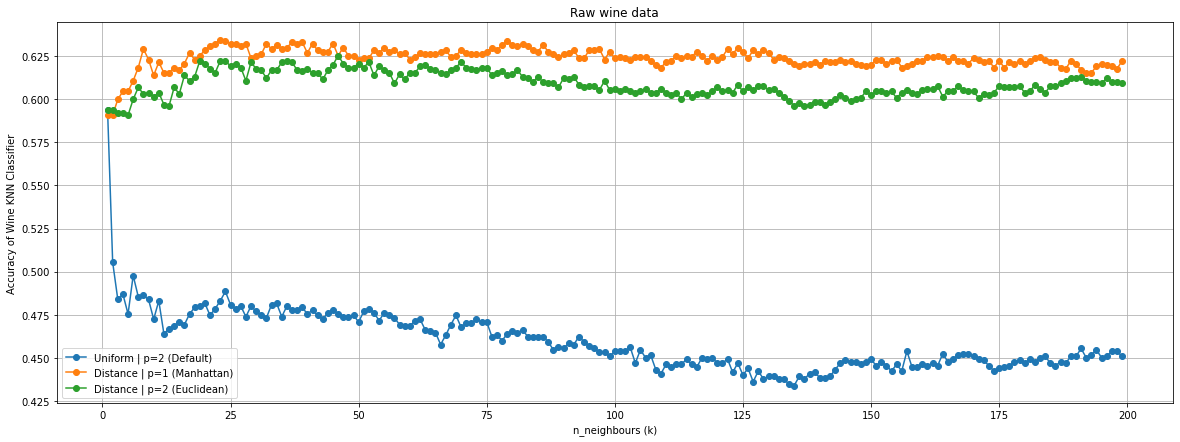

In [49]:
plt.figure(figsize=(20, 7))
plt.plot(np.arange(1,200),wine_raw_uniform_score,marker='o')
plt.plot(np.arange(1,200),wine_raw_manhattan_score,marker='o')
plt.plot(np.arange(1,200),wine_raw_euclidean_score,marker='o')
plt.ylabel('Accuracy of Wine KNN Classifier')
plt.xlabel('n_neighbours (k)')
plt.grid(True)
plt.legend(["Uniform | p=2 (Default)","Distance | p=1 (Manhattan)","Distance | p=2 (Euclidean)"])
plt.title("Raw wine data")


The shape of the graph is similar to that of the normalized data.

After comparing the two graphs, it is clear that normalization improves the fit accuracy of the classifier in all three weight schemes. The maximum fit accuracy achieved by the three weight schemes with both raw and normalized data is the following:

In [50]:
# calculating accuracy of raw data
wine_raw_result = pd.DataFrame()
wine_raw_result["Weight Scheme"] = ["Default","Manhattan", "Eculidean"]
wine_raw_result["Maximum Accuracy"] = [max(wine_raw_uniform_score),max(wine_raw_manhattan_score),max(wine_raw_euclidean_score)]
wine_raw_result["k for Max Accuracy"] = [wine_raw_uniform_score.index(max(wine_raw_uniform_score))+1,wine_raw_manhattan_score.index(max(wine_raw_manhattan_score))+1,wine_raw_euclidean_score.index(max(wine_raw_euclidean_score))+1]
wine_raw_result.set_index("Weight Scheme")

,Maximum Accuracy,k for Max Accuracy
Weight Scheme,,
Default,0.593846,1
Manhattan,0.634615,23
Eculidean,0.625385,46


The comparision between normalized and raw data for all three weight schemes is the following:

In [51]:
wine_raw_result["Data Type"] = ["Raw","Raw","Raw"]
wine_raw_result

wine_norm_result["Data Type"] = ["Min-Max Normalization","Min-Max Normalization","Min-Max Normalization"]

wine_summary = pd.concat([wine_raw_result, wine_norm_result])
wine_summary.sort_values(by=['Weight Scheme'])

,Weight Scheme,Maximum Accuracy,k for Max Accuracy,Data Type
0,Default,0.593846,1,Raw
0,Default,0.635385,1,Min-Max Normalization
2,Eculidean,0.625385,46,Raw
2,Eculidean,0.693846,62,Min-Max Normalization
1,Manhattan,0.634615,23,Raw
1,Manhattan,0.695385,124,Min-Max Normalization


It is clear from the table and the graph that by conducting min-max normalization during the data preprocessing, the accuracy of the KNN classifier improves in among all three weight schemes

The relative performance among the weight scheme is the same. In both raw and normalized data, manhatten generates the best accuracy, followed by Euclidean and Default.

Min-Max Normalization was effective as it improved the accuracy of the KNN classifier

#### 2.5.2 Abalone Dataset

We will use the train test split to generate a new split for the wine dataset that has not been normalized. Then we will use that split to determine the fit accuracy for all the three weight schemes as shown below:

In [52]:
abalone_x_train , abalone_x_test, abalone_y_train1, abalone_y_test1 = train_test_split(abalone_oht,abalone_oht_rings,test_size = 0.20,train_size=0.8, random_state=27)

Now we will use a for loop to record the accuracy of the classifier on a range of values of k from 1 to 199 as shown below:

In [53]:
# create the score list for manhattan and euclidean
abalone_raw_uniform_score = []
abalone_raw_manhattan_score = []
abalone_raw_euclidean_score = []
k1 = None

# for loop will be used to get the accuracy with different values of neighbours
for k1 in range(1,200):
    # created the KNN classifier for manhattan and euclidean
    abalone_raw_uniform_classifier = KNeighborsClassifier(n_neighbors=k1, weights="uniform", p=2)
    abalone_raw_manhattan_classifier = KNeighborsClassifier(n_neighbors=k1, weights="distance", p=1)
    abalone_raw_euclidean_classifier = KNeighborsClassifier(n_neighbors=k1, weights="distance", p=2)

    # training and storing the accuracy value of the default classifier
    abalone_raw_uniform_classifier.fit(abalone_x_train,abalone_y_train1)
    abalone_raw_uniform_score.append(abalone_raw_uniform_classifier.score(abalone_x_test, abalone_y_test1))
    
    # training and storing the accuracy value of the manhattan classifier
    abalone_raw_manhattan_classifier.fit(abalone_x_train,abalone_y_train1)
    abalone_raw_manhattan_score.append(abalone_raw_manhattan_classifier.score(abalone_x_test, abalone_y_test1))
    
    # training and storing the accuracy value of the euclidean classifier
    abalone_raw_euclidean_classifier.fit(abalone_x_train,abalone_y_train1)
    abalone_raw_euclidean_score.append(abalone_raw_euclidean_classifier.score(abalone_x_test, abalone_y_test1))

Now we will plot the graph to view the results:

Text(0.5, 1.0, 'Raw Abalone Data')

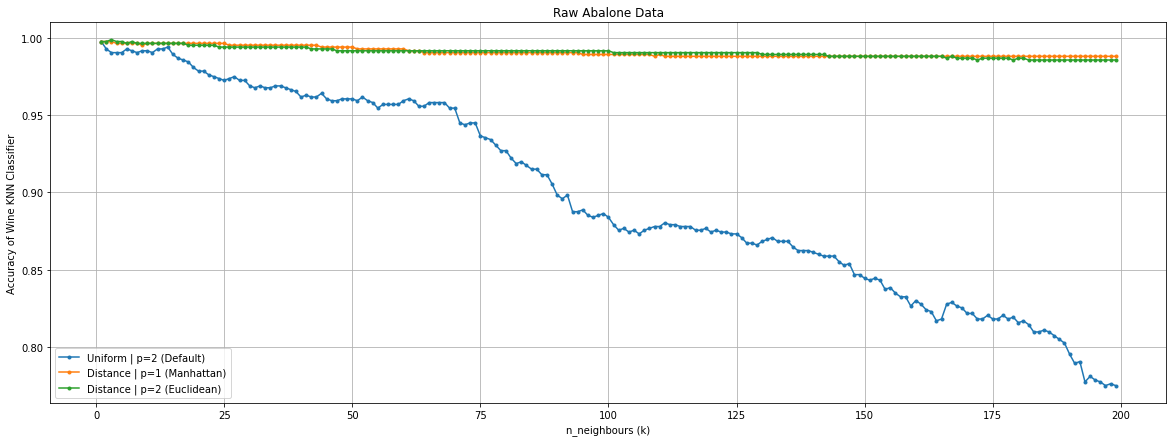

In [54]:
plt.figure(figsize=(20, 7))
plt.plot(np.arange(1,200),abalone_raw_uniform_score,marker='.')
plt.plot(np.arange(1,200),abalone_raw_manhattan_score,marker='.')
plt.plot(np.arange(1,200),abalone_raw_euclidean_score,marker='.')
plt.ylabel('Accuracy of Wine KNN Classifier')
plt.xlabel('n_neighbours (k)')
plt.grid(True)
plt.legend(["Uniform | p=2 (Default)","Distance | p=1 (Manhattan)","Distance | p=2 (Euclidean)"])
plt.title("Raw Abalone Data")

The manhattan and euclidean weight schemes have similar accuracy but the accuracy of the default weight scheme decreases significantly as the value of k in the classifier increases.

We can determine the maximium accuracy of each weight scheme by doing the following:

In [55]:
abalone_raw_result = pd.DataFrame()
abalone_raw_result["Weight Scheme"] = ["Default","Manhattan", "Eculidean"]
abalone_raw_result["Maximum Accuracy"] = [max(abalone_raw_uniform_score),max(abalone_raw_manhattan_score),max(abalone_raw_euclidean_score)]
abalone_raw_result["k for Max Accuracy"] = [abalone_raw_uniform_score.index(max(abalone_raw_uniform_score))+1,abalone_raw_manhattan_score.index(max(abalone_raw_manhattan_score))+1,abalone_raw_euclidean_score.index(max(abalone_raw_euclidean_score))+1]
abalone_raw_result.set_index("Weight Scheme")

,Maximum Accuracy,k for Max Accuracy
Weight Scheme,,
Default,0.997608,1
Manhattan,0.997608,1
Eculidean,0.998804,3


Eculidean has the best accuracy which manhattan and default have the same accuracy

We can compare the summary of the data as shown below:

In [56]:
abalone_raw_result["Data Type"] = ["Raw","Raw","Raw"]
abalone_raw_result

abalone_norm_result["Data Type"] = ["Min-Max Normalization","Min-Max Normalization","Min-Max Normalization"]

abalone_summary = pd.concat([abalone_raw_result, abalone_norm_result])
abalone_summary.sort_values(by=['Weight Scheme'])

,Weight Scheme,Maximum Accuracy,k for Max Accuracy,Data Type
0,Default,0.997608,1,Raw
0,Default,0.279904,120,Min-Max Normalization
2,Eculidean,0.998804,3,Raw
2,Eculidean,0.283493,115,Min-Max Normalization
1,Manhattan,0.997608,1,Raw
1,Manhattan,0.282297,67,Min-Max Normalization


It is clear from the table and the graph that by conducting min-max normalization during the data preprocessing, the accuracy of the KNN classifier decreases among all three weight schemes

The relative performance among the weight scheme is the same. In both raw and normalized data, euclidean generates the best accuracy, followed by Euclidean and Default.

Min-Max Normalization was not effective as it reduced the efficiency of the KNN classifier. 